In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
def get_circle(radius):
    t = np.linspace(0, 2 * np.pi, 100)
    x = radius * np.cos(t)
    y = radius * np.sin(t)
    return np.array([x, y])


def point_on_circle(radius):
    t = random.uniform(0, 2 * np.pi)
    x = radius * np.cos(t)
    y = radius * np.sin(t)
    return x, y


def point_inside_circle(radius):
    x = radius
    y = radius
    while x ** 2 + y ** 2 > radius ** 2:
        x = random.uniform(-radius, radius)
        y = random.uniform(-radius, radius)
    return x, y


def quadratic_equations(a, b, c):
    discriminant = b ** 2 - 4 * a * c
    x1 = (-b + discriminant ** 0.5) / (2 * a)
    x2 = (-b - discriminant ** 0.5) / (2 * a)
    return x1, x2


def make_line(x, y, h):
    a = 1 + (x ** 2 / (y ** 2))
    b = (2 * x * h) / (y ** 2)
    c = (h ** 2 / y ** 2) - 1
    return a, b, c


# метод "случайных концов"
def method1():
    x1, y1 = point_on_circle(1)
    x2, y2 = point_on_circle(1)
    return np.array([x1, y1, x2, y2])


# метод "случайного радиуса"
def method2():
    x, y = point_on_circle(1)
    r = random.uniform(0, 1)
    h = -r * (x ** 2 + y ** 2)
    a, b, c = make_line(x, y, h)
    x1, x2 = quadratic_equations(a, b, c)
    y1 = (-x * x1 - h) / y
    y2 = (-x * x2 - h) / y
    return np.array([x1, y1, x2, y2])


# метод "случайного центра"
def method3():
    x, y = point_inside_circle(1)
    h = - (x ** 2 + y ** 2)
    a, b, c = make_line(x, y, h)
    (x1, x2) = quadratic_equations(a, b, c)
    y1 = (-x * x1 - h) / y
    y2 = (-x * x2 - h) / y
    return np.array([x1, y1, x2, y2])


# метод двух точек внутри круга
def method4():
    x1, y1 = point_inside_circle(1)
    x2, y2 = point_inside_circle(1)
    delta1 = x2 - x1
    delta2 = y2 - y1
    h = y1 * delta1 - x1 * delta2
    a, b, c = make_line(delta2, delta1, h)
    (x1, x2) = quadratic_equations(a, b, c)
    y1 = (delta2 * x1 + h) / delta1
    y2 = (delta2 * x2 + h) / delta1
    return np.array([x1, y1, x2, y2])


# метод точки на окружности и внутри круга
def method5():
    x1, y1 = point_inside_circle(1)
    x2, y2 = point_on_circle(1)
    delta1 = x2 - x1
    delta2 = y2 - y1
    h = y1 * delta1 - x1 * delta2
    a, b, c = make_line(delta2, delta1, h)
    (x1, x2) = quadratic_equations(a, b, c)
    y1 = (delta2 * x1 + h) / delta1
    y2 = (delta2 * x2 + h) / delta1
    return np.array([x1, y1, x2, y2])


# метод различной вероятности
def method6():
    x1 = 1
    y1 = 1
    while x1 ** 2 + y1 ** 2 > 1 or x1 ** 2 + y1 ** 2 < 0.25:
        x1 = random.uniform(-1, 1)
        y1 = random.uniform(-1, 1)
    x2, y2 = point_on_circle(1)
    delta1 = x2 - x1
    delta2 = y2 - y1
    h = y1 * delta1 - x1 * delta2
    a, b, c = make_line(delta2, delta1, h)
    (x1, x2) = quadratic_equations(a, b, c)
    y1 = (delta2 * x1 + h) / delta1
    y2 = (delta2 * x2 + h) / delta1
    return np.array([x1, y1, x2, y2])


def get_center(method):
    x = 0
    y = 0
    if method == 1:
        x1, y1 = point_on_circle(1)
        x2, y2 = point_on_circle(1)
        x = (x1 + x2) / 2
        y = (y1 + y2) / 2
    elif method == 2:
        x1, y1 = point_on_circle(1)
        r = random.uniform(0, 1)
        x = (1 - r) * x1
        y = (1 - r) * y1
    elif method == 3:
        x, y = point_inside_circle(1)
    elif method == 4:
        x1, y1 = point_inside_circle(1)
        x2, y2 = point_inside_circle(1)
        x = (x1 + x2) / 2
        y = (y1 + y2) / 2
    elif method == 5:
        points = method5()
        x = (points[0] + points[2]) / 2
        y = (points[1] + points[3]) / 2
    elif method == 6:
        points = method6()
        x = (points[0] + points[2]) / 2
        y = (points[1] + points[3]) / 2
    return x, y

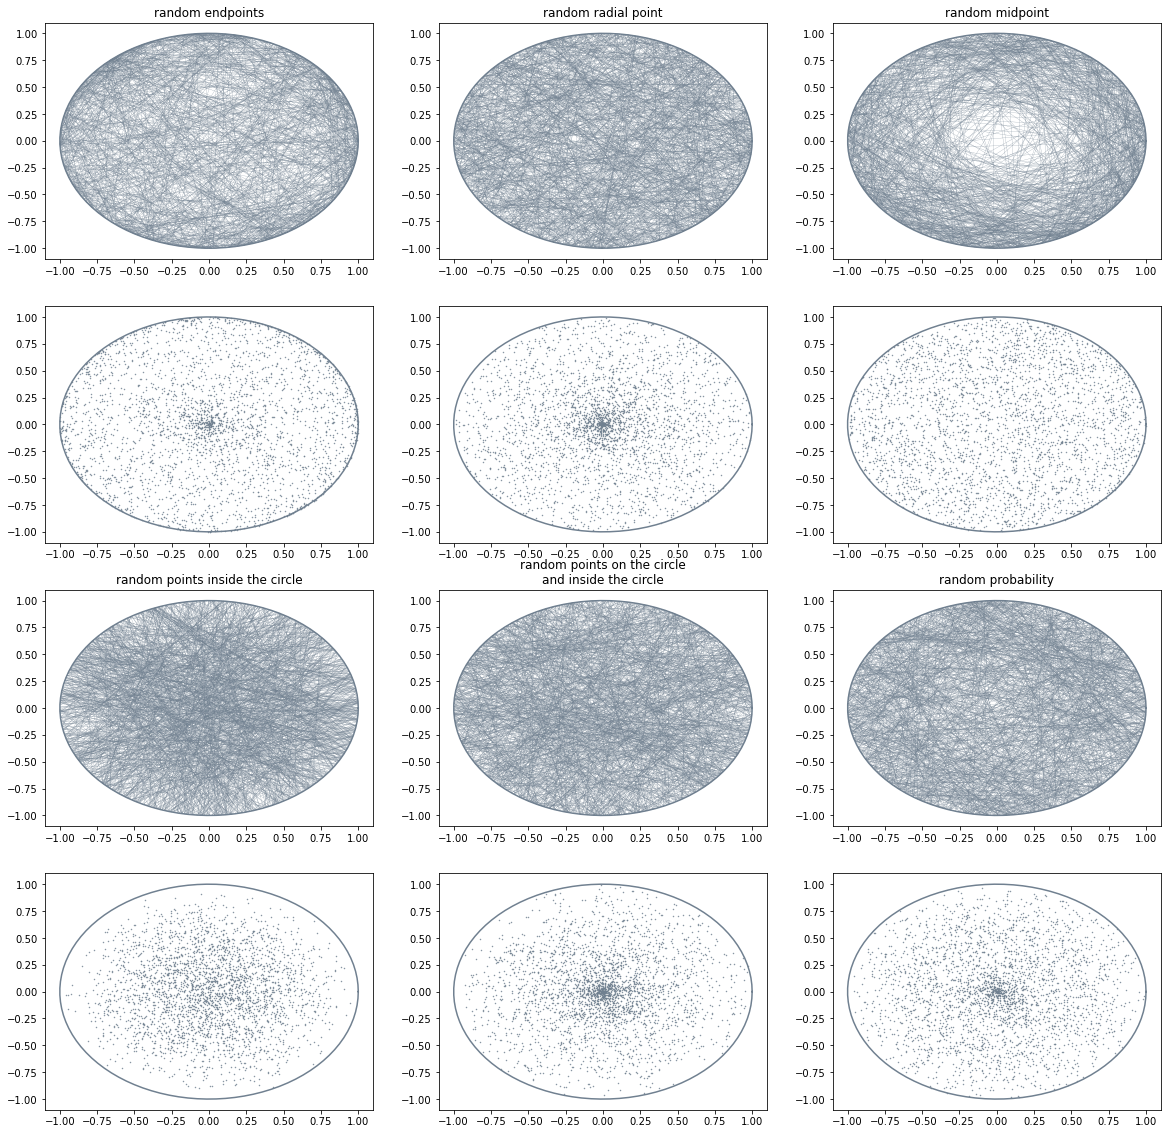

In [5]:
CHORDS = 1000
POINTS = 3000
circle = np.array(get_circle(1))

# метод "случайных концов"
plt.figure(figsize=(20, 20))
plt.subplot(4, 3, 1)
plt.plot(circle[0], circle[1], color="slategrey")
plt.title("random endpoints", color="black")
for i in range(CHORDS):
    points = method1()
    x = np.linspace(points[0], points[2], 100)
    y = np.linspace(points[1], points[3], 100)
    plt.plot(x, y, linewidth=0.2, color="slategrey")

plt.subplot(4, 3, 4)
plt.plot(circle[0], circle[1], color="slategrey")
for i in range(POINTS):
    x, y = get_center(1)
    plt.scatter(x, y, s=0.2, color="slategrey")

# метод "случайного радиуса"
plt.subplot(4, 3, 2)
plt.plot(circle[0], circle[1], color="slategrey")
plt.title("random radial point", color="black")
for i in range(CHORDS):
    points = method2()
    x = np.linspace(points[0], points[2], 100)
    y = np.linspace(points[1], points[3], 100)
    plt.plot(x, y, linewidth=0.2, color="slategrey")

plt.subplot(4, 3, 5)
plt.plot(circle[0], circle[1], color="slategrey")
for i in range(POINTS):
    x, y = get_center(2)
    plt.scatter(x, y, s=0.2, color="slategrey")

# метод "случайного центра"
plt.subplot(4, 3, 3)
plt.plot(circle[0], circle[1], color="slategrey")
plt.title("random midpoint", color="black")
for i in range(CHORDS):
    points = method3()
    x = np.linspace(points[0], points[2], 100)
    y = np.linspace(points[1], points[3], 100)
    plt.plot(x, y, linewidth=0.2, color="slategrey")

plt.subplot(4, 3, 6)
plt.plot(circle[0], circle[1], color="slategrey")
for i in range(POINTS):
    x, y = get_center(3)
    plt.scatter(x, y, s=0.2, color="slategrey")

# метод двух точек внутри круга"
plt.subplot(4, 3, 7)
plt.plot(circle[0], circle[1], color="slategrey")
plt.title("random points inside the circle", color="black")
for i in range(CHORDS):
    points = method4()
    x = np.linspace(points[0], points[2], 100)
    y = np.linspace(points[1], points[3], 100)
    plt.plot(x, y, linewidth=0.2, color="slategrey")

plt.subplot(4, 3, 10)
plt.plot(circle[0], circle[1], color="slategrey")
for i in range(POINTS):
    x, y = get_center(4)
    plt.scatter(x, y, s=0.2, color="slategrey")


# метод точки на окружности и внутри круга
plt.subplot(4, 3, 8)
plt.plot(circle[0], circle[1], color="slategrey")
plt.title("random points on the circle\nand inside the circle", color="black")
for i in range(CHORDS):
    points = method5()
    x = np.linspace(points[0], points[2], 100)
    y = np.linspace(points[1], points[3], 100)
    plt.plot(x, y, linewidth=0.2, color="slategrey")

plt.subplot(4, 3, 11)
plt.plot(circle[0], circle[1], color="slategrey")
for i in range(POINTS):
    x, y = get_center(5)
    plt.scatter(x, y, s=0.2, color="slategrey")

# метод различной вероятности
plt.subplot(4, 3, 9)
plt.plot(circle[0], circle[1], color="slategrey")
plt.title("random probability", color="black")
for i in range(CHORDS):
    points = method6()
    x = np.linspace(points[0], points[2], 100)
    y = np.linspace(points[1], points[3], 100)
    plt.plot(x, y, linewidth=0.2, color="slategrey")

plt.subplot(4, 3, 12)
plt.plot(circle[0], circle[1], color="slategrey")
for i in range(POINTS):
    x, y = get_center(6)
    plt.scatter(x, y, s=0.2, color="slategrey")
plt.show()